In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#load the data
df = pd.read_csv('/content/decision_tree_dataset.csv')
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,-1.299565,0.608232,-1.518449,1.004770,1.495378,1
1,-0.273844,1.358806,1.194674,1.223679,2.467322,1
2,-2.510600,-2.423153,-0.768365,2.434551,1.227190,0
3,0.374002,-0.794579,-0.093434,-1.252782,-2.123091,0
4,0.378860,1.193772,-0.187534,0.633405,1.692101,1


In [ ]:
x = df.drop('Target', axis = 1)
y = df['Target']

In [ ]:
#split the data
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state= 42)


In [ ]:
#scale the data, put it in the same range
scaler =  StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy' , max_depth=3, random_state= 42)
dt_classifier.fit(x_train_scaled, y_train)
#predict on the data set
y_pred = dt_classifier.predict(x_test_scaled)

#evaluation
accuracy = accuracy_score(y_test, y_pred)
con_matrix=confusion_matrix(y_test, y_pred)
classification_rep=classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:', con_matrix)
print('Classification report:', classification_rep)

Accuracy: 0.9066666666666666
Confusion matrix: [[68  9]
 [ 5 68]]
Classification report:               precision    recall  f1-score   support

           0       0.93      0.88      0.91        77
           1       0.88      0.93      0.91        73

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



<function matplotlib.pyplot.show(close=None, block=None)>

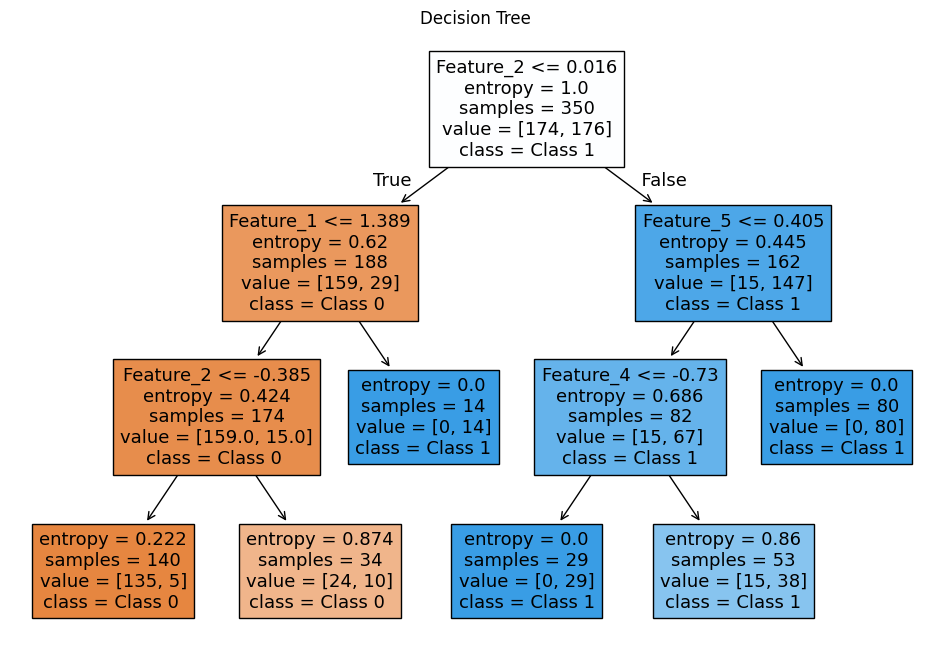

In [ ]:
#visiualize the tree
plt.figure(figsize=(12,8))
plot_tree(dt_classifier, feature_names=x.columns, class_names=['Class 0 ', 'Class 1'], filled=True)
plt.title('Decision Tree')
plt.show

In [ ]:
#try with different max_depth  values

for depth in range(1,6):
  dt=DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
  dt.fit(x_train_scaled, y_train)
  y_pred=dt.predict(x_test_scaled)
  acc=accuracy_score(y_test, y_pred)
  print(f'max depth :{depth}, Accuracy:{acc}')

max depth :1, Accuracy:0.8533333333333334
max depth :2, Accuracy:0.9066666666666666
max depth :3, Accuracy:0.9066666666666666
max depth :4, Accuracy:0.88
max depth :5, Accuracy:0.9


In [ ]:
#compare the gini impurity with the entropy
for x in ['gini', 'entropy']:
  dt=DecisionTreeClassifier(criterion=x, max_depth=3, random_state=42)
  dt.fit(x_train_scaled, y_train)
  y_pred= dt.predict(x_test_scaled)
  acc=accuracy_score(y_test, y_pred)
  print(f'Criterion: {x}, Accuracy: {acc}')

Criterion: gini, Accuracy: 0.9066666666666666
Criterion: entropy, Accuracy: 0.9066666666666666
